# Alfven wave propagation test

 The goal of this test is to propagate an Alfvén wave in a 1D domain with and without fixed mesh refinement. The Ohm's law in these runs is pure electron ideal term (no electron pressure, no dissipation)

In [1]:
# some preliminary settings and functions

import sys
sys.path.append("/home/aunai/build_phare")
sys.path.append("/home/aunai/PHARE/pyphare/")
import os
import numpy as np
import pyphare
from pyphare.pharesee.hierarchy import finest_data
from pyphare.pharesee.hierarchy import hierarchy_from
from pyphare.pharesee.plotting import zoom_effect
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.pharesee.hierarchy import compute_hier_from
%matplotlib notebook


def plot_job(job, time, qty, file_idx=None,**kwargs):
    path = os.path.join(main_jobs_path, job)
    r = Run(path)
    t=time        
    B = r.GetB(t)
    N = r.GetNi(t)
    V = r.GetVi(t)
    if qty in ("Bx","By","Bz"):
        self = B
    if qty == "rho":
        self = N
    if qty in ("Vx", "Vy", "Vz"):
        self = V
    fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8,6), sharex=True)
    colors = ["k", "b", "r"]
    for ilvl, lvl in self.patch_levels.items():
        for pidx, patch in enumerate(lvl.patches):
            pdata  = patch.patch_datas[qty]
            x,v = finest_data(pdata, ilvl, self)
            ax1.plot(x, v,label="lev{} - patch{}".format(ilvl, pidx),
                     marker='o', markersize=2, color=colors[ilvl])

    for ilvl,level in B.patch_levels.items():
        for patch in level.patches:
            dx = patch.dx
            x0 = patch.origin[0]
            x1 = (patch.box.upper[0]+1)*dx
            ax2.axvspan(x0, x1, color='b',ec='k', alpha=0.2,
                        ymin=ilvl/4, ymax=(ilvl+1)/4)

    ax1.set_title("{} at t = {}".format(job,t))

    ax1.set_ylim(kwargs.get("ylim",(-3.5, 3.5)))

    ax1.set_xlim(kwargs.get("xlim", (0,500)))
    if file_idx is not None:
        fig.savefig(path+'/'+job+"_"+qty+"_{:04d}.png".format(file_idx))
        plt.close(fig)
    return fig, ax1, ax2

In [2]:
# some variable definitions
main_jobs_path = "../phare_jobs/tests/functional/alfven_wave/"

jobs = [
        "alfven_refine",
        "alfven_norefine"
      ]

## 1 level refinement

Here we manually setup the refinement box so that it is refined with one level between x=3 and x=6.3

<IPython.core.display.Javascript object>


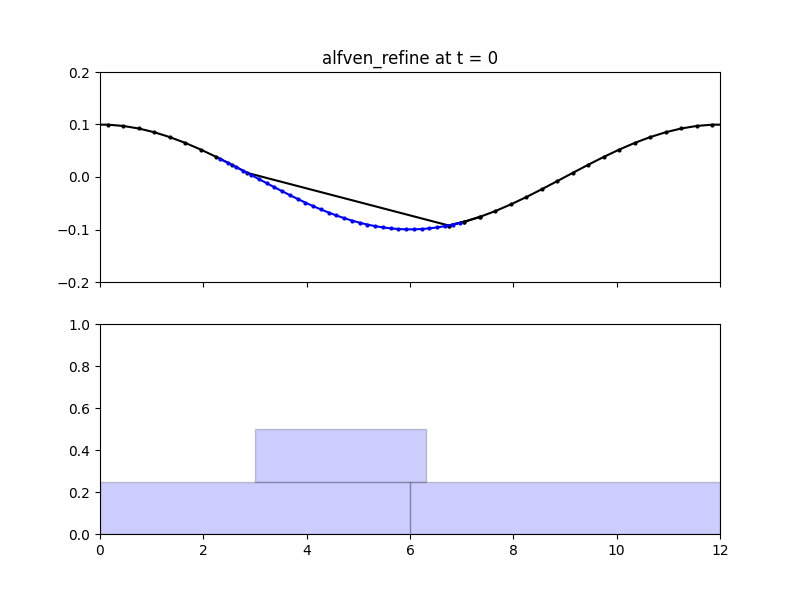

(<Figure size 800x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f61aca491c0>)

In [3]:
plot_job("alfven_refine", 0, "By", ylim=(-0.2,0.2), xlim=(0,12))

<IPython.core.display.Javascript object>


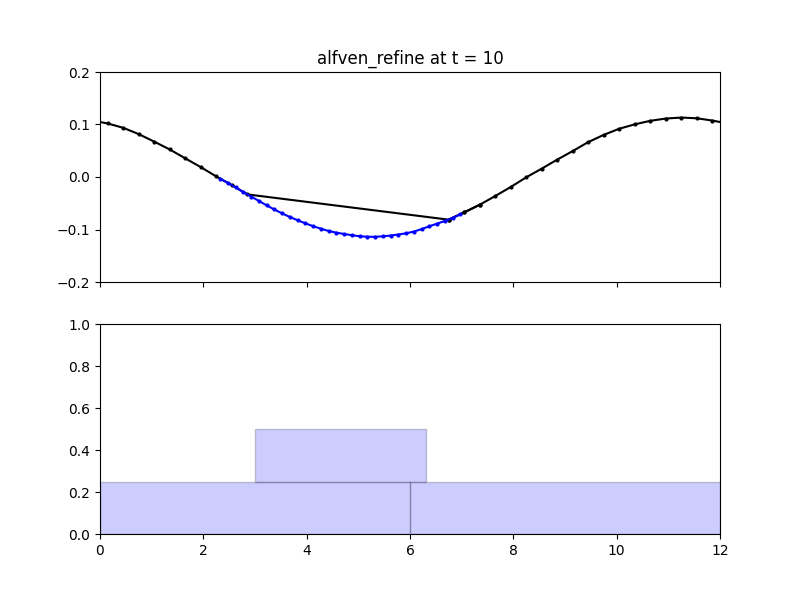

(<Figure size 800x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f61ac5fe040>)

In [4]:
plot_job("alfven_refine", 10, "By", ylim=(-0.2,0.2), xlim=(0,12))

In [ ]:
#movie
for it,t in enumerate(get_times(main_jobs_path+"alfven_refine/EM_B.h5")):
    plot_job("alfven_refine", t, "By", it, ylim=(0.8,1.2), xlim=(0,12))

## with no refinement

<IPython.core.display.Javascript object>


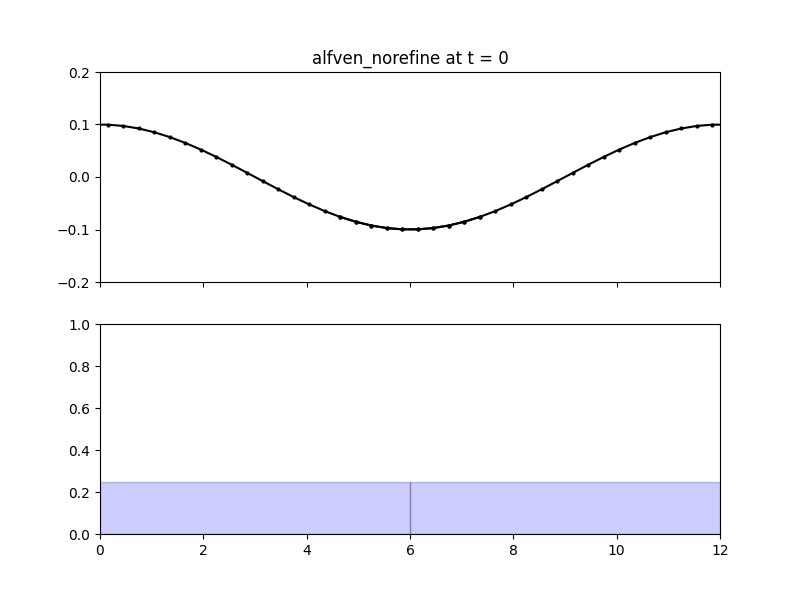

(<Figure size 800x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f61ac1853d0>)

In [5]:
plot_job("alfven_norefine", 0, "By", ylim=(-0.2,0.2), xlim=(0,12))

<IPython.core.display.Javascript object>


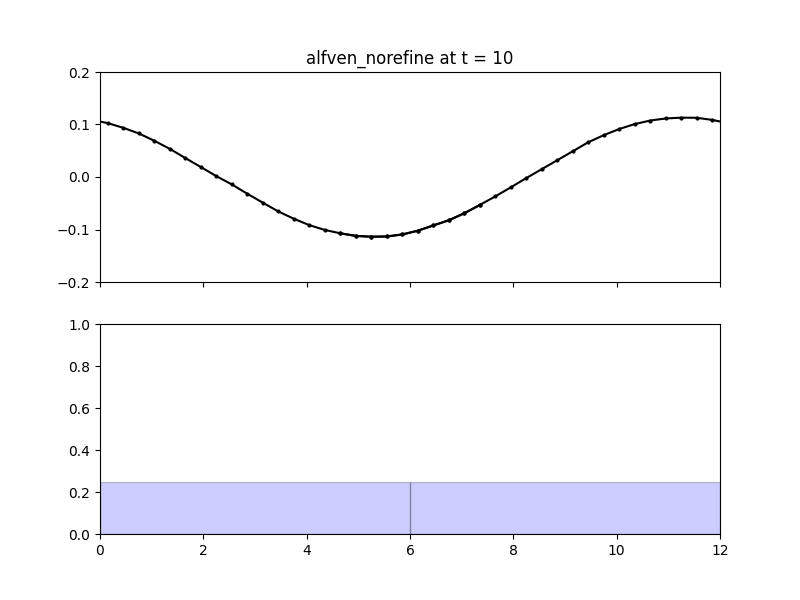

(<Figure size 800x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f61abd6d430>)

In [6]:
plot_job("alfven_norefine", 10, "By", ylim=(-0.2,0.2), xlim=(0,12))